In [1]:
using Revise

ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
using FileIO
using JLD2
using RiskSensitiveSAC

┌ Info: Number of Julia Thread(s): 1
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: GeForce RTX 2080 Ti
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/env_trajectron++/bin/python3.6
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:41


In [2]:
include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");

u_nominal_cand = append!([u_nominal_base],
                         [round.([a*cos(deg2rad(θ)), a*sin(deg2rad(θ))], digits=5)
                          for a = [3.] for θ = 0.:45.:(360. - 45.)])            # nominal control candidate value [ax, ay] [m/s^2]
nominal_search_depth = 4;
prediction_steps = 4;
dtr = 0.4;
tcalc = 0.4;
dtexec = [0.0];

include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [3]:
9^4

6561

In [4]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false
Loaded evaluation data from /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905
Loaded Trajectron model from /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/Trajectron-plus-plus/experiments/pedestrians/models/eth_attention_radius_3/model_registrar-100.pt


In [5]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false);

┌ Warning: Time 0.00 [sec]: SAC computation took 27.923 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/rs_sac_controller.jl:731
┌ Warning: Time 0.00 [sec]: This evaluation iteration took 0.484 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:249
┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.384 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:249
┌ Warning: Time 0.40 [sec]: SAC computation took 0.445 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/rs_sac_controller.jl:731
┌ Warning: Time 0.44 [sec]: This evaluation iteration took 0.043 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/s

┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.044 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:249
┌ Warning: Time 6.82 [sec]: This evaluation iteration took 0.044 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:249
┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.044 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:249
┌ Warning: Time 7.20 [sec]: SAC computation took 0.502 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/rs_sac_controller.jl:731
┌ Warning: Time 7.24 [sec]: This evaluation iteration took 0.047 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:249
┌ Warning:

In [6]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New SAC control computation is scheduled.
Time 0.00 [sec]: New SAC control is available to the controller.
Time 0.00 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.02 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.04 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.06 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.08 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.10 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.12 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.14 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.16 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.18 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.20 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.22 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.24 [sec]: Control: [0.0, 0.0] is applied to the s

Time 2.66 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.68 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.70 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.72 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.74 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.76 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.78 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.80 [sec]: New measurement is obtained.
Time 2.80 [sec]: New prediction is scheduled.
Time 2.80 [sec]: New SAC control computation is scheduled.
Time 2.80 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.82 [sec]: New prediction is available to the controller.
Time 2.82 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.84 [sec]: New SAC control is available to the controller.
Time 2.84 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.86 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.88 [sec]: Control: [

Time 5.26 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.28 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.30 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.32 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.34 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.36 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.38 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.40 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.42 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.44 [sec]: Control: [2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 5.46 [sec]: Control: [2.1213200092315674, -2.1213200092

Time 7.48 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 7.50 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 7.52 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 7.54 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 7.56 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 7.58 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 7.60 [sec]: New measurement is obtained.
Time 7.60 [sec]: New prediction is scheduled.
Time 7.60 [sec]: New SAC control computation is scheduled.
Time 7.60 [sec]: Control: [0.0, 3.0] is applied to the system.
Time 7.62 [sec]: New prediction is available to the controller.
Time 7.62 [sec]: Control: [0.0, 3.0] is applied to the system.
Time 7.64 [sec]: New SAC control is available to the controller.
Time 7.64 [sec]: Control: [0.0, 3.0] is applied to the system.
Time 7.66 [sec]: Control: [0.0, 3.0] is applied to the system.
Time 7.68 [sec]: Control: [0.0, 3.0] is applied to the system.
Time 7.70 [sec]: Control: [

In [7]:
result.total_cnt_cost

1.81799965390216

In [8]:
result.total_pos_cost

0.9192094355240402

In [9]:
result.total_col_cost

0.35766365271418055

In [10]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

3.0948727421403808

In [11]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

1.2675273573136407

Progress: 100%|█████████████████████████████████████████| Time: 0:02:17
┌ Info: Saved animation to 
│   fn = /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/7_data_extensive_search.gif
└ @ Plots /home/haruki/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/7_data_extensive_search.gif")
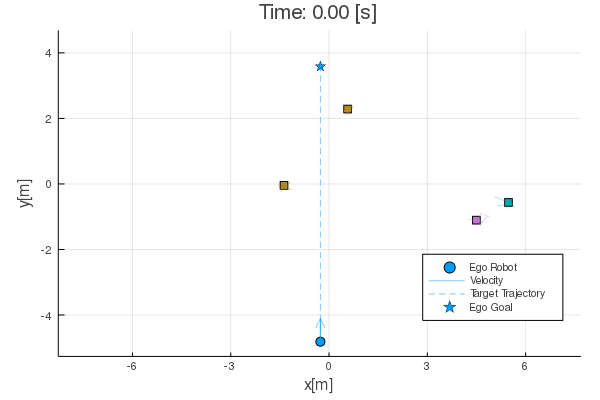

In [12]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="7_data_extensive_search.gif")

In [13]:
save("7_data_extensive_search.jld2", "result", result)